In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import inventorize3 as inv

In [2]:
df = pd.read_csv('pineapple_juice.csv')
df.head(3)

,day,pineapple_juice,price
0,1,131,1.38
1,2,147,1.06
2,3,101,1.98


In [3]:
model = LinearRegression()

In [4]:
model.fit(X = df[['price']], y = df[['pineapple_juice']])

LinearRegression()

In [5]:
print(model.coef_)
print(model.intercept_)

[[-50.]]
[200.]


In [6]:
df.price.max()

2.56

In [7]:
df.price.min()

0.22

In [8]:
simulation_data = pd.DataFrame({'price': np.linspace(start = 0.01, stop = 3.00, num = 300)})
simulation_data

,price
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05
...,...
295,2.96
296,2.97
297,2.98
298,2.99


In [9]:
simulation_data['demand'] = simulation_data['price'] * model.coef_[0] + model.intercept_[0]
simulation_data['revenue'] = simulation_data['demand'] * simulation_data['price']
simulation_data['cost'] = simulation_data['demand'] * 0.7
simulation_data['profit'] = simulation_data['revenue'] - simulation_data['cost']

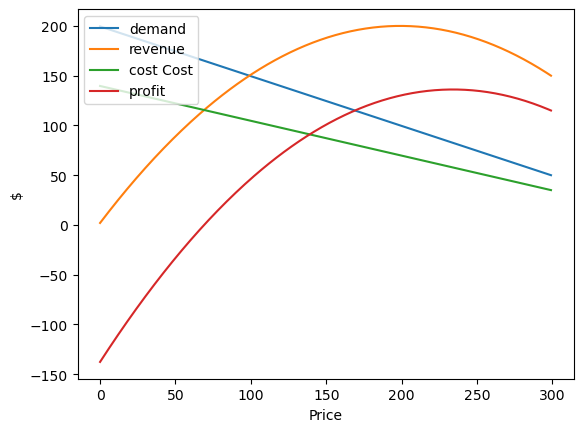

In [10]:
plt.plot(simulation_data['demand'], label='demand')
plt.plot(simulation_data['revenue'], label='revenue')
plt.plot(simulation_data['cost'], label='cost Cost')
plt.plot(simulation_data['profit'], label='profit')
plt.xlabel('Price')
plt.ylabel('$')
plt.legend(loc='upper left')
plt.show()

In [11]:
simulation_data[simulation_data['profit'] == simulation_data['profit'].max()]

,price,demand,revenue,cost,profit
234,2.35,82.5,193.875,57.75,136.125


In [12]:
df

,day,pineapple_juice,price
0,1,131,1.38
1,2,147,1.06
2,3,101,1.98
3,4,139,1.22
4,5,121,1.58
...,...,...,...
361,362,174,0.52
362,363,130,1.40
363,364,84,2.32
364,365,138,1.24


In [13]:
elasticity = inv.linear_elasticity(df['price'], df['pineapple_juice'], 2.2, 0.7)
elasticity

C:\Users\thanh\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


{'Elasticity': array([[1.22222222]]),
 'optimum_price_profit': array([[2.35]]),
 'optimum_price_revenue': array([[2.]])}